<a href="https://colab.research.google.com/github/gotjd709/AI_class_KSA/blob/main/2020.12.16.Wed.ApplicationofRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Natural language
1-1 ~ 1-4: 자연어 전처리 과정

1-5: One-hot encoding

1-6: Word Embedding


### 1-1. tockenization
- 주어진 텍스트를 토큰이라 불리는 단위로 나누는 작업

In [2]:
# Tockenization

from tensorflow.keras.preprocessing.text import text_to_word_sequence
sequence = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."
result = text_to_word_sequence(sequence)
print(result)


["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


### 1-2. Cleaning and Normalization

#### cleaning: 갖고 있는 텍스트로부터 노이즈 데이터를 제거
- 토큰화 작업에 방해되는 요소를 배제
- 토큰화 후에 남아 있는 노이즈 제거


#### normalization: 표현 방법이 다른 단어들을 통합
- 대소문자 통합
- 같은 의미의 단어 통합
- 불필요한 단어 제거


In [4]:
# Cleaning and Normalization

import re
text = "I was wondering if anyone out there could enlighten me on this car."
shortword = re.compile(r'\W*\b\w{1,2}\b') # Regular Expression 객체 반환
print(shortword.sub('', text)) # Regular Expression과 일치하는 부분을 ''으로 대체

# r string: row string이라고도 하며 escape 문자를 인식하지 않음  
# escape: back slash 
# re.compile(): 정규표현식 해석 및 객체반환
# re.findall(): 매치되는 모든 문자열을 리스트로 반환
# re.sub(): 매치되는 모든 문자열을 다른 문자열로 대체
# re.search(): 매치여부를 검사
# 정규표현식의 연습 사이트: https://regexr.com/

 was wondering anyone out there could enlighten this car.


### 1-3. Integer Encoding
- 텍스트를 숫자로 바꾸는 기법

In [7]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer

text = "..."

sentences = text_to_word_sequence(text) # 단어들의 시퀀스 반환

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences) # 단어들의 빈도수에 따라 정수 부여

from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer

text = "A barber is a person. a barber is good person.\
 A barber is huge person. he Knew A Secret!\
 The Secret He kept is huge secret. Huge secret.\
 His barber kept his word. A barber kept his word.\
 His barber kept his secret. But keeping and keeping such a huge secret\
 to himself was driving the barber crazy.\
 The barber went up a huge mountain."

sentences = text_to_word_sequence(text)
print(sentences)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences) # 빈도수를 기준으로 단어 집합을 생성
print(tokenizer.word_index) # 단어의 정수화 결과
print(tokenizer.word_counts) # 단어의 빈도수 출력

['a', 'barber', 'is', 'a', 'person', 'a', 'barber', 'is', 'good', 'person', 'a', 'barber', 'is', 'huge', 'person', 'he', 'knew', 'a', 'secret', 'the', 'secret', 'he', 'kept', 'is', 'huge', 'secret', 'huge', 'secret', 'his', 'barber', 'kept', 'his', 'word', 'a', 'barber', 'kept', 'his', 'word', 'his', 'barber', 'kept', 'his', 'secret', 'but', 'keeping', 'and', 'keeping', 'such', 'a', 'huge', 'secret', 'to', 'himself', 'was', 'driving', 'the', 'barber', 'crazy', 'the', 'barber', 'went', 'up', 'a', 'huge', 'mountain']
{'a': 1, 'barber': 2, 'secret': 3, 'huge': 4, 'his': 5, 'is': 6, 'kept': 7, 'person': 8, 'the': 9, 'he': 10, 'word': 11, 'keeping': 12, 'good': 13, 'knew': 14, 'but': 15, 'and': 16, 'such': 17, 'to': 18, 'himself': 19, 'was': 20, 'driving': 21, 'crazy': 22, 'went': 23, 'up': 24, 'mountain': 25}
OrderedDict([('a', 8), ('barber', 8), ('is', 4), ('person', 3), ('good', 1), ('huge', 5), ('he', 2), ('knew', 1), ('secret', 6), ('the', 3), ('kept', 4), ('his', 5), ('word', 2), ('bu

In [9]:
# Normalization and Integer Encoding

text = "A barber is a person. a barber is good person.\
 A barber is huge person. he Knew A Secret!\
 The Secret He kept is huge secret. Huge secret.\
 His barber kept his word. A barber kept his word.\
 His barber kept his secret. But keeping and keeping such a huge secret\
 to himself was driving the barber crazy.\
 The barber went up a huge mountain."

shortword = re.compile(r'\W*\b\w{1,2}\b') # Regular Expression 객체 반환
text = shortword.sub('', text) # Regular Expression과 일치하는 부분을 ''으로 대체

sentences = text_to_word_sequence(text)
print(sentences)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences) # 빈도수를 기준으로 단어 집합을 생성
print(tokenizer.word_index) # 단어의 정수화 결과
print(tokenizer.word_counts) # 단어의 빈도수 출력


['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'the', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'his', 'barber', 'kept', 'his', 'word', 'barber', 'kept', 'his', 'word', 'his', 'barber', 'kept', 'his', 'secret', 'but', 'keeping', 'and', 'keeping', 'such', 'huge', 'secret', 'himself', 'was', 'driving', 'the', 'barber', 'crazy', 'the', 'barber', 'went', 'huge', 'mountain']
{'barber': 1, 'secret': 2, 'huge': 3, 'his': 4, 'kept': 5, 'person': 6, 'the': 7, 'word': 8, 'keeping': 9, 'good': 10, 'knew': 11, 'but': 12, 'and': 13, 'such': 14, 'himself': 15, 'was': 16, 'driving': 17, 'crazy': 18, 'went': 19, 'mountain': 20}
OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('the', 3), ('kept', 4), ('his', 5), ('word', 2), ('but', 1), ('keeping', 2), ('and', 1), ('such', 1), ('himself', 1), ('was', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


### 1-4. Padding
- 컴퓨터는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 처리가 가능하기 때문에 필요한 작업으로 각 문장이 서로 길이가 다를 수 있으므로 문장의 길이를 동일하게 맞춰주는 작업

In [10]:
# Padding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pprint import pprint
# pad_sequences: 
# pprint: 보기 좋게 출력해주는 역할

sentences = [['barber', 'person'],
 ['barber', 'good', 'person'],
 ['knew', 'secret'],
 ['secret', 'kept', 'huge', 'secret'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'secret'],
 ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
 ['barber', 'went', 'huge', 'mountain']]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

encoded = tokenizer.texts_to_sequences(sentences)
pprint(encoded)

padded = pad_sequences(encoded, padding='post') #post는 뒤에서부터 0을 붙이는 역할
print(f"padded = \n{padded}")


[[1, 5],
 [1, 7, 5],
 [8, 2],
 [2, 3, 4, 2],
 [1, 3, 9],
 [1, 3, 2],
 [6, 6, 4, 2, 10, 1, 11],
 [1, 12, 4, 13]]
padded = 
[[ 1  5  0  0  0  0  0]
 [ 1  7  5  0  0  0  0]
 [ 8  2  0  0  0  0  0]
 [ 2  3  4  2  0  0  0]
 [ 1  3  9  0  0  0  0]
 [ 1  3  2  0  0  0  0]
 [ 6  6  4  2 10  1 11]
 [ 1 12  4 13  0  0  0]]


### 1-5. One-hot encoding
- 고차원 벡터 (단어 집합의 크기)
- 희소 벡터 
- 단어 집합의 최대크기를 벡터의 차원으로 설정
- 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식



In [11]:
# One-hot encoding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text="A barber is a person. He is good person. He is huge person."
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print(tokenizer.word_index)

sub_text = "He is good person."
encoded = tokenizer.texts_to_sequences([sub_text])
pprint(encoded[0])

one_hot = to_categorical(encoded[0])
print(f"one_hot = \n{one_hot}")


{'is': 1, 'person': 2, 'a': 3, 'he': 4, 'barber': 5, 'good': 6, 'huge': 7}
[4, 1, 6, 2]
one_hot = 
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]]


### 1-6. Word Embedding
- 저차원 벡터
- 밀집 벡터
- 단어를 밀집 벡터의 형태로 표현하는 방법
- 단어의 유사도를 표현하면서도 공간을 효율적으로 사용하는 방법

# 2. Sentiment Classification
텍스트에서 정보를 추출하여 특정 주제에 대한 주관적인 인상, 감정, 태도 등을 파악하는 자연어처리(NLP)의 한 분류

####분석방식
- 감성단어사전을 이용한 감성분석
- 텍스트의 문법적 구조 파악을 통한 감성분석
- 기계학습을 통한 감성분석


In [22]:
# Sentiment Classification
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Embedding, SimpleRNN, TimeDistributed
from tensorflow.keras.layers import Dropout, Dense

sentences = ['What I cannot create, I do not understand.',
 'Intellecuals solve problems, geniuses prevent them',
 'A person who never made a mistake never tied anything new.',
 'The same equations have the same solutions.']


In [23]:
## tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences) # 각 행에 토큰화를 수행
x_data = tokenizer.texts_to_sequences(sentences) # 단어를 인덱스로 변환 저장
print(tokenizer.word_index)
vocab_size = len(tokenizer.word_index) + 1

{'i': 1, 'a': 2, 'never': 3, 'the': 4, 'same': 5, 'what': 6, 'cannot': 7, 'create': 8, 'do': 9, 'not': 10, 'understand': 11, 'intellecuals': 12, 'solve': 13, 'problems': 14, 'geniuses': 15, 'prevent': 16, 'them': 17, 'person': 18, 'who': 19, 'made': 20, 'mistake': 21, 'tied': 22, 'anything': 23, 'new': 24, 'equations': 25, 'have': 26, 'solutions': 27}


In [24]:
## padding
sequence_size = max(len(s) for s in x_data)
print(f"최대 길이 : {sequence_size}")

x_data = pad_sequences(sequences=x_data, maxlen=sequence_size,
 padding='post', truncating='post') # 'post'는 오른쪽을 패딩
y_data = np.array([1, 0, 0, 1]) # 0:albert einstein이 한 말, # 1:richard feyman이 한 말

print(f"x_data = \n{x_data}")
print(f"y_data = {y_data}")

최대 길이 : 11
x_data = 
[[ 6  1  7  8  1  9 10 11  0  0  0]
 [12 13 14 15 16 17  0  0  0  0  0]
 [ 2 18 19  3 20  2 21  3 22 23 24]
 [ 4  5 25 26  4  5 27  0  0  0  0]]
y_data = [1 0 0 1]


In [25]:
## RNN model
hidden_size = [10, 10]
nb_classes = 2

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=vocab_size))
model.add(SimpleRNN(units=hidden_size[0], return_sequences=True))
model.add(TimeDistributed(Dropout(rate=.2)))
model.add(SimpleRNN(units=hidden_size[1]))
model.add(Dropout(rate=.2))
model.add(Dense(units=nb_classes))

model.compile(optimizer='adam',
 loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
 metrics=["accuracy"])
model.summary()

hist = model.fit(x_data, y_data, validation_data=(x_data, y_data),
 verbose=2, batch_size=2, epochs=15)
model.evaluate(x_data, y_data, batch_size=2, verbose=2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 28)          784       
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 10)          390       
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 10)          0         
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 10)                210       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 1,406
Trainable params: 1,406
Non-trainable params: 0
____________________________________________________

[0.15668928623199463, 1.0]

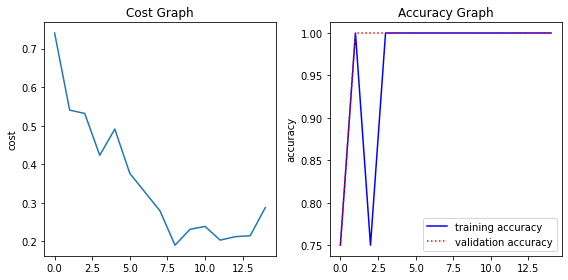

In [26]:
## Reporting
plt.figure(figsize=(8, 4)) # 8 x 4 inchs
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("Cost Graph")
plt.ylabel("cost")
plt.subplot(1, 2, 2)
plt.title("Accuracy Graph")
plt.ylabel("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training accuracy")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Morpholohy


### 3-1. Morphological analysis
- 문장에서 단어의 품사를 분석하는 것

In [27]:
sentences = [['I', 'feel', 'hungry'],
 ['tensorflow', 'is', 'very', 'difficult'],
 ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
 ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
 ['noun', 'verb', 'adverb', 'adjective'],
 ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
 ['noun', 'verb', 'adverb', 'adjective', 'verb']]


In [28]:
## 단어 리스트 만들기
word_list = sum(sentences, []) # flatten
print(word_list)


['I', 'feel', 'hungry', 'tensorflow', 'is', 'very', 'difficult', 'tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning', 'tensorflow', 'is', 'very', 'fast', 'changing']


In [29]:
## creating a token dictionary for word
word_list = sorted(set(word_list))
word_list = ['<pad>'] + word_list
word2idx = {word : idx for idx, word in enumerate(word_list)}
idx2word = {idx : word for idx, word in enumerate(word_list)}
print(f"word2idx = \n{word2idx}")
print(f"idx2word = \n{idx2word}")
print(f"len(idx2word) = {len(idx2word)}")

word2idx = 
{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
idx2word = 
{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}
len(idx2word) = 15


In [30]:
# creating a token dictionary for part of speech
pos_list = sum(pos, [])
pos_list = sorted(set(pos_list))
pos_list = ['<pad>'] + pos_list
pos2idx = {pos : idx for idx, pos in enumerate(pos_list)}
idx2pos = {idx : pos for idx, pos in enumerate(pos_list)}
print(f"pos2idx = \n{pos2idx}")
print(f"idx2pos = \n{idx2pos}")
print(f"len(idx2pos) = {len(idx2pos)}")

pos2idx = 
{'<pad>': 0, 'adjective': 1, 'adverb': 2, 'determiner': 3, 'noun': 4, 'preposition': 5, 'pronoun': 6, 'verb': 7}
idx2pos = 
{0: '<pad>', 1: 'adjective', 2: 'adverb', 3: 'determiner', 4: 'noun', 5: 'preposition', 6: 'pronoun', 7: 'verb'}
len(idx2pos) = 8


In [31]:
# converting sequence of tokens to sequence of indices
max_sequence = 10
x_data = list(map(lambda sentence : [word2idx.get(token) for token in sentence], sentences))
y_data = list(map(lambda sentence : [pos2idx.get(token) for token in sentence], pos))

In [32]:
# padding the sequence of indices
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence, padding='post')
x_data_mask = ((x_data != 0) * 1).astype(np.float32)
x_data_len = list(map(lambda sentence : len(sentence), sentences))
y_data = pad_sequences(sequences = y_data, maxlen = max_sequence, padding='post')

In [33]:
# checking data
print(f"x_data =\n{x_data}")
print(f"x_data_len = {x_data_len}")
print(f"x_data_mask =\n{x_data_mask}")
print(f"y_data = \n{y_data}")

x_data =
[[ 1  7 10  0  0  0  0  0  0  0]
 [13 11 14  5  0  0  0  0  0  0]
 [13 11  2  9  8  4 12  0  0  0]
 [13 11 14  6  3  0  0  0  0  0]]
x_data_len = [3, 4, 7, 5]
x_data_mask =
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
y_data = 
[[6 7 1 0 0 0 0 0 0 0]
 [4 7 2 1 0 0 0 0 0 0]
 [4 7 3 4 5 1 4 0 0 0]
 [4 7 2 1 7 0 0 0 0 0]]


In [34]:
# Model

num_classes = len(pos2idx)
hidden_dim = 10

input_dim = len(word2idx)
output_dim = len(word2idx)
one_hot = np.eye(len(word2idx))

model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=output_dim, mask_zero=True,
                    trainable=False, input_length=max_sequence,
                    embeddings_initializer=tf.keras.initializers.Constant(one_hot)))
model.add(SimpleRNN(units=hidden_dim, return_sequences=True))
model.add(TimeDistributed(Dense(units=num_classes)))

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 10, 15)            225       
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 10, 10)            260       
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 8)             88        
Total params: 573
Trainable params: 348
Non-trainable params: 225
_________________________________________________________________


In [36]:
# 학습 및 평가

hist = model.fit(x_data, y_data,
                 validation_data=(x_data, y_data),
                 verbose=2, batch_size=2, epochs=300)

model.evaluate(x_data, y_data, batch_size=2, verbose=2)

y_pred = model.predict(x_data)
y_pred = np.argmax(y_pred, axis=-1) * x_data_mask
print(f"accuracy : {np.mean(y_pred == y_data):.2%}")


Epoch 1/300
2/2 - 0s - loss: 0.9945 - accuracy: 0.0526 - val_loss: 0.9882 - val_accuracy: 0.0526
Epoch 2/300
2/2 - 0s - loss: 0.9868 - accuracy: 0.0526 - val_loss: 0.9804 - val_accuracy: 0.0526
Epoch 3/300
2/2 - 0s - loss: 0.9793 - accuracy: 0.0526 - val_loss: 0.9727 - val_accuracy: 0.0526
Epoch 4/300
2/2 - 0s - loss: 0.9707 - accuracy: 0.0526 - val_loss: 0.9652 - val_accuracy: 0.0526
Epoch 5/300
2/2 - 0s - loss: 0.9631 - accuracy: 0.0526 - val_loss: 0.9578 - val_accuracy: 0.0526
Epoch 6/300
2/2 - 0s - loss: 0.9564 - accuracy: 0.0526 - val_loss: 0.9502 - val_accuracy: 0.0526
Epoch 7/300
2/2 - 0s - loss: 0.9490 - accuracy: 0.0526 - val_loss: 0.9427 - val_accuracy: 0.0526
Epoch 8/300
2/2 - 0s - loss: 0.9408 - accuracy: 0.0526 - val_loss: 0.9354 - val_accuracy: 0.0526
Epoch 9/300
2/2 - 0s - loss: 0.9343 - accuracy: 0.0526 - val_loss: 0.9281 - val_accuracy: 0.0526
Epoch 10/300
2/2 - 0s - loss: 0.9259 - accuracy: 0.1053 - val_loss: 0.9210 - val_accuracy: 0.1053
Epoch 11/300
2/2 - 0s - loss:

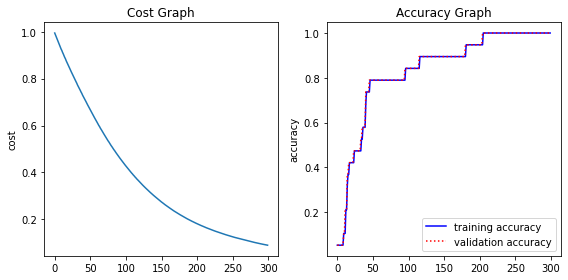

In [37]:
# Reporting....
plt.figure(figsize=(8, 4)) # 8 x 4 inchs
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("Cost Graph")
plt.ylabel("cost")
plt.subplot(1, 2, 2)
plt.title("Accuracy Graph")
plt.ylabel("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training accuracy")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# 4. Spam Classification

- 스팸 분류기

In [47]:
# Spam dataset
# download link : https://www.kaggle.com/uciml/sms-spam-collection-dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

data = pd.read_csv('spam.csv',encoding='latin1')
print(f"number of data = {len(data)}")

data[:5]

number of data = 5572


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


number of data = 5169


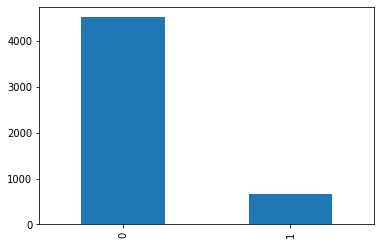

In [48]:
# 필요없는 열 제거 / ham=0, spam=1로 대체
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])

# v2 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['v2'], inplace=True)
print(f"number of data = {len(data)}")

data['v1'].value_counts().plot(kind='bar');
plt.show()


In [49]:
# 데이터 분리
X_data = data['v2']
y_data = data['v1']

# 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 인덱스로 변환
# print(tokenizer.word_index) # 1 ~ 679
vocab_size = len(tokenizer.word_index) + 1

# 패딩(padding)
max_len = max(len(s) for s in sequences)
print(f"메일의 최대 길이 : {max_len}")
pad_data = pad_sequences(sequences, maxlen = max_len)

메일의 최대 길이 : 189


In [50]:
# 학습용과 테스트용으로 분리
n_train = int(len(sequences) * 0.8)
n_test = int(len(sequences) - n_train)
X_train = pad_data[:n_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장
X_test = pad_data[n_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장

In [51]:
# 학습모델
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(LSTM(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          285472    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 293,825
Trainable params: 293,825
Non-trainable params: 0
_________________________________________________________________


Epoch 1/4
52/52 - 5s - loss: 0.3067 - accuracy: 0.8827 - val_loss: 0.1712 - val_accuracy: 0.9625
Epoch 2/4
52/52 - 5s - loss: 0.1162 - accuracy: 0.9716 - val_loss: 0.0866 - val_accuracy: 0.9770
Epoch 3/4
52/52 - 5s - loss: 0.0620 - accuracy: 0.9888 - val_loss: 0.0597 - val_accuracy: 0.9819
Epoch 4/4
52/52 - 5s - loss: 0.0348 - accuracy: 0.9906 - val_loss: 0.0609 - val_accuracy: 0.9831
33/33 [==============================] - 0s 15ms/step - loss: 0.0631 - accuracy: 0.9845


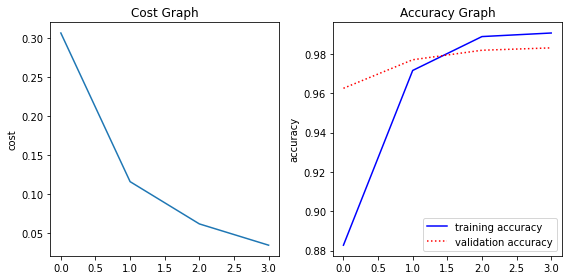

In [52]:
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=4, batch_size=64, verbose=2)
model.evaluate(X_test, y_test)

# Reporting......
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("Cost Graph")
plt.ylabel("cost")
plt.subplot(1, 2, 2)
plt.title("Accuracy Graph")
plt.ylabel("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training accuracy")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()


# 5. Sequence-to-Sequence / Attention / Transformer


### 5-1. Sequence-to-Sequence
- 입력된 시퀀스로부터 다른 시퀀스를 출력하는 분야에서 사용되는 모델


#### seq 2 seq의 구성

- Encoder: sequence를 순차적으로 입력 받은 후, 마지막에 모든 단어 정보들이 압축된 벡터를 decode로 전송

- Decoder: context vector를 초기값으로 받아서 sequence를 순차적으로 출력

#### Teacher forcing

- 오류를 줄이기 위해 1-step씩 시간차를 두고 학습시키는 것

- 오류가 발생되지 않도록 강제로 정답을 알려주는 역할을 함

#### 문제점

- 정보손실: 하나의 고정된 벡터에 모든 정보를 압축함으로써 정보손실이 발생

- 기울기 손실: RNN의 고질적인 문제이며 입력문장이 긴 경우에 제대로 작동하기 어려움



### 5-2. Attetion

- Decoder에서 출력단어를 예측할 때마다 인코더의 입력문장을 참고

- 해당 시점에서 예측할 단어와 연관된 단어부분을 더 집중해서 참고



### 5-3. Transformer

- Attention을 RNN(LSTM)을 보정하기 위한 용도가 아니라, 아예 Attention만으로 Encoder와 Decoder를 만든 것

# 6. 번외 : 앞으로 더 공부해야 할 것들

### 6-1. Machine Learing의 주요문제
- Classification
- Object Detection
- Image Segmentation
- Natural Language Processing

### 6-2. Deep Learning Methods
- R-CNN(Region based CNN)
  - 영역기반 물체인식
- 강화학습
  - 로봇 제어, 엘리베이터 스케줄링, 통신망, 게임 등
- GAN(Generative Adversarial Networks)
  - 데이터 생성
